# Import Databases 

In [1]:
import brightway2 as bw
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import time

%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
bw.projects.set_current("SOFC")  # setup and name project

<IPython.core.display.Javascript object>

In [3]:
if "ecoinvent 3.6" not in bw.databases:
    link = "E:\ecoinvent3.6cutoffecoSpold02\datasets"
    ei36 = bw.SingleOutputEcospold2Importer(link, "ecoinvent 3.6", use_mp=False)
    ei36.apply_strategies()
    ei36.statistics()
    ei36.write_database()

<IPython.core.display.Javascript object>

In [4]:
bw.databases  # display database name

Databases dictionary with 8 object(s):
	MCFC import
	PAFC import
	PEMFC import
	SOFC import
	biosphere3
	ecoinvent 3.6
	operation
	systemExpansion

<IPython.core.display.Javascript object>

In [5]:
len(bw.Database("ecoinvent 3.6"))  # display number of act in DB

18121

<IPython.core.display.Javascript object>

In [6]:
eidb = bw.Database("ecoinvent 3.6")
type(eidb)

bw2data.backends.peewee.database.SQLiteBackend

<IPython.core.display.Javascript object>

# Building LCA Matrices

In [7]:
structured_array = np.load(eidb.filepath_processed())
pd.DataFrame(structured_array).head()

,input,output,row,col,type,uncertainty_type,amount,loc,scale,shape,minimum,maximum,negative
0,1,5476,4294967295,4294967295,2,0,7.897230e-12,7.897230e-12,NaN,NaN,NaN,NaN,False
1,1,5534,4294967295,4294967295,2,0,1.602601e-09,1.602601e-09,NaN,NaN,NaN,NaN,False
2,1,5714,4294967295,4294967295,2,0,3.974192e-09,3.974192e-09,NaN,NaN,NaN,NaN,False
3,1,6311,4294967295,4294967295,2,2,2.184000e-03,-6.126597e+00,0.466905,NaN,NaN,NaN,False
4,1,6312,4294967295,4294967295,2,2,3.251733e-04,-8.031152e+00,0.466905,NaN,NaN,NaN,False


<IPython.core.display.Javascript object>

In [8]:
pd.Series(bw.mapping).head()

0    (biosphere3, 38a622c6-f086-4763-a952-7c6b3b1c4...
1    (biosphere3, 541a823c-0aad-4dc4-9123-d4af4647d...
2    (biosphere3, 8cbaa905-41b0-4327-8403-bf1c8eb25...
3    (biosphere3, f681eb3c-854a-4f78-bcfe-76dfbcf9d...
4    (biosphere3, a0fec60d-3f74-48bf-a2d2-58c30fc13...
dtype: object

<IPython.core.display.Javascript object>

In [9]:
eidb.metadata  # 数据库类型

{'overwrite': False,
 'format': 'Ecoinvent XML',
 'depends': ['biosphere3'],
 'backend': 'sqlite',
 'number': 18121,
 'modified': '2020-01-10T10:05:41.471000',
 'searchable': True,
 'processed': '2020-01-10T10:08:32.535000'}

<IPython.core.display.Javascript object>

# Setup Foreground Database 

In [10]:
# Setup Foreground Database for SOFC
SOFC = bw.ExcelImporter(
    r"E:\tencent files\chrome Download\Research\LCA\LCA SOFC\BW2Import\SOFC_Import.xlsx"
)
SOFC.apply_strategies()
SOFC.match_database(
    "ecoinvent 3.6", fields=("name", "unit", "location", "reference product")
)
SOFC.statistics()

C:\Users\教务处13\AppData\Local\Programs\Python\Python38\lib\site-packages\bw2io\importers\excel.py:41: UserWarning: Invalid first cell (A1) in worksheet Sheet2
  warnings.warn("Invalid first cell (A1) in worksheet {}".format(sheet))
C:\Users\教务处13\AppData\Local\Programs\Python\Python38\lib\site-packages\bw2io\importers\excel.py:41: UserWarning: Invalid first cell (A1) in worksheet Sheet3
  warnings.warn("Invalid first cell (A1) in worksheet {}".format(sheet))


Extracted 1 worksheets in 0.41 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: convert_activity_parameters_to_list
Applied 16 strategies in 0.29 seconds
Applying strategy: link_iterable_by_fields
18 datasets
72 exchanges
0 unlinked exchanges
  


(18, 72, 0)

<IPython.core.display.Javascript object>

In [11]:
# check unlinked exchanges
SOFC.write_excel()
SOFC.write_database()

Writing activities to SQLite3 database:


Wrote matching file to:
C:\Users\教务处13\AppData\Local\pylca\Brightway3\SOFC.6b6e45b646d3f7510875adf749c4e552\output\db-matching-SOFC-import.xlsx


0% [##################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 06/25/2020 15:37:43
  Finished: 06/25/2020 15:37:43
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 2.91
Created database: SOFC import


<IPython.core.display.Javascript object>

In [12]:
# Setup database foreground for MCFC
MCFC = bw.ExcelImporter(
    r"E:\tencent files\chrome Download\Research\LCA\LCA SOFC\BW2Import\MCFC_Import.xlsx"
)
MCFC.apply_strategies()
MCFC.match_database(
    "ecoinvent 3.6", fields=("name", "unit", "location", "reference product")
)
MCFC.statistics()
MCFC.write_excel()
MCFC.write_database()

Extracted 1 worksheets in 0.14 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: convert_activity_parameters_to_list
Applied 16 strategies in 0.21 seconds
Applying strategy: link_iterable_by_fields


Writing activities to SQLite3 database:


14 datasets
66 exchanges
0 unlinked exchanges
  
Wrote matching file to:
C:\Users\教务处13\AppData\Local\pylca\Brightway3\SOFC.6b6e45b646d3f7510875adf749c4e552\output\db-matching-MCFC-import.xlsx


0% [##############] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 06/25/2020 15:37:46
  Finished: 06/25/2020 15:37:46
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 3.08
Created database: MCFC import


<IPython.core.display.Javascript object>

In [13]:
# Setup database foreground for PAFC
PAFC = bw.ExcelImporter(
    r"E:\tencent files\chrome Download\Research\LCA\LCA SOFC\BW2Import\PAFC_Import.xlsx"
)
PAFC.apply_strategies()
PAFC.match_database(
    "ecoinvent 3.6", fields=("name", "unit", "location", "reference product")
)
PAFC.statistics()
PAFC.write_excel()
PAFC.write_database()

Extracted 1 worksheets in 0.15 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: convert_activity_parameters_to_list
Applied 16 strategies in 0.19 seconds
Applying strategy: link_iterable_by_fields


Writing activities to SQLite3 database:


16 datasets
73 exchanges
0 unlinked exchanges
  
Wrote matching file to:
C:\Users\教务处13\AppData\Local\pylca\Brightway3\SOFC.6b6e45b646d3f7510875adf749c4e552\output\db-matching-PAFC-import.xlsx


0% [################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 06/25/2020 15:37:48
  Finished: 06/25/2020 15:37:48
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 3.16
Created database: PAFC import


<IPython.core.display.Javascript object>

In [14]:
# Setup database foreground for PEMFC
PEMFC = bw.ExcelImporter(
    r"E:\tencent files\chrome Download\Research\LCA\LCA SOFC\BW2Import\PEMFC_Import.xlsx"
)
PEMFC.apply_strategies()
PEMFC.match_database(
    "ecoinvent 3.6", fields=("name", "unit", "location", "reference product")
)
PEMFC.statistics()
PEMFC.write_excel()
PEMFC.write_database()

Extracted 1 worksheets in 0.03 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: convert_activity_parameters_to_list
Applied 16 strategies in 0.23 seconds
Applying strategy: link_iterable_by_fields


Writing activities to SQLite3 database:


16 datasets
75 exchanges
0 unlinked exchanges
  
Wrote matching file to:
C:\Users\教务处13\AppData\Local\pylca\Brightway3\SOFC.6b6e45b646d3f7510875adf749c4e552\output\db-matching-PEMFC-import.xlsx


0% [################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 06/25/2020 15:37:50
  Finished: 06/25/2020 15:37:50
  Total time elapsed: 00:00:00
  CPU %: 104.00
  Memory %: 3.28
Created database: PEMFC import


<IPython.core.display.Javascript object>

In [15]:
# setup database for operation
link = r"E:\tencent files\chrome Download\Research\LCA\LCA SOFC\BW2Import\operation_import.xlsx"
op_db = bw.ExcelImporter(link)
op_db.apply_strategies()
op_db.match_database(
    db_name="ecoinvent 3.6", fields=["name", "unit", "location", "uncertainty"]
)
op_db.statistics()
op_db.write_excel()
op_db.write_database()

Extracted 1 worksheets in 0.02 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: convert_activity_parameters_to_list
Applied 16 strategies in 0.21 seconds
Applying strategy: link_iterable_by_fields


Writing activities to SQLite3 database:


5 datasets
23 exchanges
0 unlinked exchanges
  
Wrote matching file to:
C:\Users\教务处13\AppData\Local\pylca\Brightway3\SOFC.6b6e45b646d3f7510875adf749c4e552\output\db-matching-operation.xlsx


0% [#####] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 06/25/2020 15:37:53
  Finished: 06/25/2020 15:37:53
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 3.32
Created database: operation


<IPython.core.display.Javascript object>

In [16]:
# setup database for system expansion
sys_expan = bw.ExcelImporter(
    r"E:\tencent files\chrome Download\Research\LCA\LCA SOFC\BW2Import\SystemExpansion.xlsx"
)
sys_expan.apply_strategies()
sys_expan.match_database(
    "ecoinvent 3.6", fields=["name", "unit", "location", "uncertainty"]
)
sys_expan.statistics()
sys_expan.write_excel()
sys_expan.write_database()

Extracted 1 worksheets in 0.01 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: convert_activity_parameters_to_list
Applied 16 strategies in 0.26 seconds
Applying strategy: link_iterable_by_fields


Writing activities to SQLite3 database:


5 datasets
8 exchanges
0 unlinked exchanges
  
Wrote matching file to:
C:\Users\教务处13\AppData\Local\pylca\Brightway3\SOFC.6b6e45b646d3f7510875adf749c4e552\output\db-matching-systemExpansion.xlsx


0% [#####] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/18/2020 16:09:54
  Finished: 05/18/2020 16:09:54
  Total time elapsed: 00:00:00
  CPU %: 97.50
  Memory %: 3.60
Created database: systemExpansion


<IPython.core.display.Javascript object>

In [17]:
bw.databases

Databases dictionary with 8 object(s):
	MCFC import
	PAFC import
	PEMFC import
	SOFC import
	biosphere3
	ecoinvent 3.6
	operation
	systemExpansion

<IPython.core.display.Javascript object>

In [18]:
# prepare SOFC calc
SOFC_import = bw.Database("SOFC import")
MCFC_import = bw.Database("MCFC import")
PAFC_import = bw.Database("PAFC import")
PEMFC_import = bw.Database("PEMFC import")
op_db_import = bw.Database("operation")
sys_exp_import = bw.Database("systemExpansion")

<IPython.core.display.Javascript object>

In [19]:
list(op_db_import)

['electricity_pemfc' (kilowatt hour, GLO, None),
 'electricity_sofc' (kilowatt hour, GLO, None),
 'electricity_pafc' (kilowatt hour, GLO, None),
 'electricity production' (pcs, GLO, None),
 'electricity_mcfc' (kilowatt hour, GLO, None)]

<IPython.core.display.Javascript object>

# Setup LCA Calc 

## Setup functional unit 

In [20]:
# find activity name
def find_by_name(name, database):
    possibles = [x for x in database if x["name"] == name]
    assert len(possibles) == 1, "Found {} possibile activities".format(len(possibles))
    return possibles[0]

<IPython.core.display.Javascript object>

In [21]:
# list SOFC activities
SOFC_foreground_name = [
    "Cell stack, pcs",
    "Fuel Processor, pcs",
    "Power Conditioining, pcs",
    "Thermal Management, pcs",
    "Manufacturing",
    "Disposal",
]

<IPython.core.display.Javascript object>

In [22]:
for SOFC_name in SOFC_foreground_name:
    ls = find_by_name(SOFC_name, SOFC_import)
type(ls)

bw2data.backends.peewee.proxies.Activity

<IPython.core.display.Javascript object>

In [23]:
# create functional unit for SOFC
SOFC_foreground = [
    find_by_name(SOFC_name, SOFC_import) for SOFC_name in SOFC_foreground_name
]
SOFC_FU = [{SOFC_foreground[x]: 1} for x in range(len(SOFC_foreground))]
SOFC_FU

[{'Cell stack, pcs' (pcs, GLO, None): 1},
 {'Fuel Processor, pcs' (pcs, GLO, None): 1},
 {'Power Conditioining, pcs' (pcs, GLO, None): 1},
 {'Thermal Management, pcs' (pcs, GLO, None): 1},
 {'Manufacturing' (pcs, GLO, None): 1},
 {'Disposal' (pcs, GLO, None): 1}]

<IPython.core.display.Javascript object>

In [24]:
# Setup FU for MCFC
MCFC_foreground_name = [
    "Cell stack, pcs",
    "Fuel Processor, pcs",
    "Power Conditioining, pcs",
    "Thermal Management, pcs",
    "Manufacturing",
    "Disposal",
]

MCFC_foreground = [
    find_by_name(MCFC_name, MCFC_import) for MCFC_name in MCFC_foreground_name
]
MCFC_FU = [{MCFC_foreground[x]: 1} for x in range(len(MCFC_foreground))]
MCFC_FU

[{'Cell stack, pcs' (pcs, GLO, None): 1},
 {'Fuel Processor, pcs' (pcs, GLO, None): 1},
 {'Power Conditioining, pcs' (pcs, GLO, None): 1},
 {'Thermal Management, pcs' (pcs, GLO, None): 1},
 {'Manufacturing' (pcs, GLO, None): 1},
 {'Disposal' (pcs, GLO, None): 1}]

<IPython.core.display.Javascript object>

In [25]:
# Setup FU for PAFC
PAFC_foreground_name = [
    "Cell stack, pcs",
    "Fuel Processor, pcs",
    "Power Conditioining, pcs",
    "Thermal Management, pcs",
    "Manufacturing",
    "Disposal",
]

PAFC_foreground = [
    find_by_name(PAFC_name, PAFC_import) for PAFC_name in PAFC_foreground_name
]
PAFC_FU = [{PAFC_foreground[x]: 1} for x in range(len(PAFC_foreground))]
PAFC_FU

[{'Cell stack, pcs' (pcs, GLO, None): 1},
 {'Fuel Processor, pcs' (pcs, GLO, None): 1},
 {'Power Conditioining, pcs' (pcs, GLO, None): 1},
 {'Thermal Management, pcs' (pcs, GLO, None): 1},
 {'Manufacturing' (pcs, GLO, None): 1},
 {'Disposal' (pcs, GLO, None): 1}]

<IPython.core.display.Javascript object>

In [26]:
# Setup FU for PEMFC
PEMFC_foreground_name = [
    "Cell stack, pcs",
    "Fuel Processor, pcs",
    "Power Conditioining, pcs",
    "Thermal Management, pcs",
    "Manufacturing",
    "Disposal",
]

PEMFC_foreground = [
    find_by_name(PEMFC_name, PEMFC_import) for PEMFC_name in PEMFC_foreground_name
]
PEMFC_FU = [{PEMFC_foreground[x]: 1} for x in range(len(PEMFC_foreground))]
PEMFC_FU

[{'Cell stack, pcs' (pcs, GLO, None): 1},
 {'Fuel Processor, pcs' (pcs, GLO, None): 1},
 {'Power Conditioining, pcs' (pcs, GLO, None): 1},
 {'Thermal Management, pcs' (pcs, GLO, None): 1},
 {'Manufacturing' (pcs, GLO, None): 1},
 {'Disposal' (pcs, GLO, None): 1}]

<IPython.core.display.Javascript object>

In [27]:
# Setup FU for Operation
operation_foreground_name = [
    "electricity_sofc",
    "electricity_mcfc",
    "electricity_pafc",
    "electricity_pemfc",
]
operation = [
    find_by_name(operation_name, op_db_import)
    for operation_name in operation_foreground_name
]
operation_FU = [{operation[i]: 1} for i in range(len(operation))]
operation_FU

[{'electricity_sofc' (kilowatt hour, GLO, None): 1},
 {'electricity_mcfc' (kilowatt hour, GLO, None): 1},
 {'electricity_pafc' (kilowatt hour, GLO, None): 1},
 {'electricity_pemfc' (kilowatt hour, GLO, None): 1}]

<IPython.core.display.Javascript object>

In [28]:
# Setup FU for natural gas production
ng_prod = [
    act
    for act in eidb
    if "market for natural gas, low pressure" in act["name"]
    and "RoW" in act["location"]
]
ng_prod_FU = [{ng_prod[0]: 1}]
ng_prod_FU

[{'market for natural gas, low pressure' (cubic meter, RoW, None): 1}]

<IPython.core.display.Javascript object>

In [29]:
len(sys_exp_import)

5

<IPython.core.display.Javascript object>

In [30]:
sys_expan_name = [
    "system expansion_sofc",
    "system expansion_mcfc",
    "system expansion_pafc",
    "system expansion_pemfc",
]
sys_expan = [
    find_by_name(sys_expan_act, sys_exp_import) for sys_expan_act in sys_expan_name
]
sys_expan_FU = [{sys_expan[i]: 1} for i in range(len(sys_expan))]
sys_expan_FU

[{'system expansion_sofc' (pcs, GLO, None): 1},
 {'system expansion_mcfc' (pcs, GLO, None): 1},
 {'system expansion_pafc' (pcs, GLO, None): 1},
 {'system expansion_pemfc' (pcs, GLO, None): 1}]

<IPython.core.display.Javascript object>

## Setup LCIA 

In [31]:
list(bw.methods)

[('CML 2001 (obsolete)', 'resources', 'depletion of abiotic resources'),
 ('CML 2001 (obsolete)', 'acidification potential', 'average European'),
 ('CML 2001 (obsolete)', 'acidification potential', 'generic'),
 ('CML 2001 (obsolete)', 'climate change', 'GWP 100a'),
 ('CML 2001 (obsolete)', 'climate change', 'GWP 20a'),
 ('CML 2001 (obsolete)', 'climate change', 'GWP 500a'),
 ('CML 2001 (obsolete)', 'climate change', 'lower limit of net GWP'),
 ('CML 2001 (obsolete)', 'climate change', 'upper limit of net GWP'),
 ('CML 2001 (obsolete)', 'eutrophication potential', 'average European'),
 ('CML 2001 (obsolete)', 'eutrophication potential', 'generic'),
 ('CML 2001 (obsolete)', 'freshwater aquatic ecotoxicity', 'FAETP 100a'),
 ('CML 2001 (obsolete)', 'freshwater aquatic ecotoxicity', 'FAETP 20a'),
 ('CML 2001 (obsolete)', 'freshwater aquatic ecotoxicity', 'FAETP 500a'),
 ('CML 2001 (obsolete)', 'freshwater aquatic ecotoxicity', 'FAETP infinite'),
 ('CML 2001 (obsolete)', 'freshwater sediment

<IPython.core.display.Javascript object>

In [32]:
ReCiPe = [method for method in bw.methods if 'ReCiPe Midpoint (H) V1.13' in str(method) 
                                          and 'w/o LT' not in str(method)
                                          and 'no LT' not in str(method)
                                          and 'obsolete' not in str(method)]
ReCiPe


[('ReCiPe Midpoint (H) V1.13', 'freshwater ecotoxicity', 'FETPinf'),
 ('ReCiPe Midpoint (H) V1.13', 'human toxicity', 'HTPinf'),
 ('ReCiPe Midpoint (H) V1.13', 'marine ecotoxicity', 'METPinf'),
 ('ReCiPe Midpoint (H) V1.13', 'terrestrial ecotoxicity', 'TETPinf'),
 ('ReCiPe Midpoint (H) V1.13', 'metal depletion', 'MDP'),
 ('ReCiPe Midpoint (H) V1.13', 'agricultural land occupation', 'ALOP'),
 ('ReCiPe Midpoint (H) V1.13', 'climate change', 'GWP100'),
 ('ReCiPe Midpoint (H) V1.13', 'fossil depletion', 'FDP'),
 ('ReCiPe Midpoint (H) V1.13', 'freshwater eutrophication', 'FEP'),
 ('ReCiPe Midpoint (H) V1.13', 'ionising radiation', 'IRP_HE'),
 ('ReCiPe Midpoint (H) V1.13', 'marine eutrophication', 'MEP'),
 ('ReCiPe Midpoint (H) V1.13', 'natural land transformation', 'NLTP'),
 ('ReCiPe Midpoint (H) V1.13', 'ozone depletion', 'ODPinf'),
 ('ReCiPe Midpoint (H) V1.13', 'particulate matter formation', 'PMFP'),
 ('ReCiPe Midpoint (H) V1.13', 'photochemical oxidant formation', 'POFP'),
 ('ReCiPe Mi

<IPython.core.display.Javascript object>

In [33]:
ReCiPe_end = [method for method in bw.methods if 'ReCiPe Endpoint (H,A)' in str(method)
                                                 and 'total' in str(method)][1] # point based total 
ReCiPe.append(ReCiPe_end)


<IPython.core.display.Javascript object>

In [34]:
ReCiPe

[('ReCiPe Midpoint (H) V1.13', 'freshwater ecotoxicity', 'FETPinf'),
 ('ReCiPe Midpoint (H) V1.13', 'human toxicity', 'HTPinf'),
 ('ReCiPe Midpoint (H) V1.13', 'marine ecotoxicity', 'METPinf'),
 ('ReCiPe Midpoint (H) V1.13', 'terrestrial ecotoxicity', 'TETPinf'),
 ('ReCiPe Midpoint (H) V1.13', 'metal depletion', 'MDP'),
 ('ReCiPe Midpoint (H) V1.13', 'agricultural land occupation', 'ALOP'),
 ('ReCiPe Midpoint (H) V1.13', 'climate change', 'GWP100'),
 ('ReCiPe Midpoint (H) V1.13', 'fossil depletion', 'FDP'),
 ('ReCiPe Midpoint (H) V1.13', 'freshwater eutrophication', 'FEP'),
 ('ReCiPe Midpoint (H) V1.13', 'ionising radiation', 'IRP_HE'),
 ('ReCiPe Midpoint (H) V1.13', 'marine eutrophication', 'MEP'),
 ('ReCiPe Midpoint (H) V1.13', 'natural land transformation', 'NLTP'),
 ('ReCiPe Midpoint (H) V1.13', 'ozone depletion', 'ODPinf'),
 ('ReCiPe Midpoint (H) V1.13', 'particulate matter formation', 'PMFP'),
 ('ReCiPe Midpoint (H) V1.13', 'photochemical oxidant formation', 'POFP'),
 ('ReCiPe Mi

<IPython.core.display.Javascript object>

In [35]:
indicators = [ReCiPe[6], ReCiPe[7], ReCiPe[13], ReCiPe[15]]
indicators

[('ReCiPe Midpoint (H) V1.13', 'climate change', 'GWP100'),
 ('ReCiPe Midpoint (H) V1.13', 'fossil depletion', 'FDP'),
 ('ReCiPe Midpoint (H) V1.13', 'particulate matter formation', 'PMFP'),
 ('ReCiPe Midpoint (H) V1.13', 'terrestrial acidification', 'TAP100')]

<IPython.core.display.Javascript object>

In [36]:
ia_cat0 = [
    "FETP",
    "HTP",
    "METP",
    "TETP",
    "MDP",
    "ALOP",
    "GWP100",
    "FDP",
    "FEP",
    "IRP",
    "MEP",
    "NLTP",
    "ODP",
    "PMFP",
    "POFP",
    "TAP100",
    "ULOP",
    "WDP",
]
ia_cat = [
    "FETP",
    "HTP",
    "METP",
    "TETP",
    "MDP",
    "ALOP",
    "GWP100",
    "FDP",
    "FEP",
    "IRP",
    "MEP",
    "NLTP",
    "ODP",
    "PMFP",
    "POFP",
    "TAP100",
    "ULOP",
    "WDP",
    "Total",
]
ia_cat1 = ["GWP", "FDP", "PMFP", "AP"]

<IPython.core.display.Javascript object>

## Calc LCIA results 

In [37]:
# setup FU and impact assessment method
bw.calculation_setups["SOFC_LCIA"] = {"inv": SOFC_FU, "ia": ReCiPe}

<IPython.core.display.Javascript object>

In [38]:
SOFC_multi = bw.MultiLCA("SOFC_LCIA").results

<IPython.core.display.Javascript object>

In [39]:
SOFC_LCIA_results = pd.DataFrame(
    data=SOFC_multi, columns=ReCiPe, index=SOFC_foreground_name
)
SOFC_LCIA_results

,"(ReCiPe Midpoint (H) V1.13, freshwater ecotoxicity, FETPinf)","(ReCiPe Midpoint (H) V1.13, human toxicity, HTPinf)","(ReCiPe Midpoint (H) V1.13, marine ecotoxicity, METPinf)","(ReCiPe Midpoint (H) V1.13, terrestrial ecotoxicity, TETPinf)","(ReCiPe Midpoint (H) V1.13, metal depletion, MDP)","(ReCiPe Midpoint (H) V1.13, agricultural land occupation, ALOP)","(ReCiPe Midpoint (H) V1.13, climate change, GWP100)","(ReCiPe Midpoint (H) V1.13, fossil depletion, FDP)","(ReCiPe Midpoint (H) V1.13, freshwater eutrophication, FEP)","(ReCiPe Midpoint (H) V1.13, ionising radiation, IRP_HE)","(ReCiPe Midpoint (H) V1.13, marine eutrophication, MEP)","(ReCiPe Midpoint (H) V1.13, natural land transformation, NLTP)","(ReCiPe Midpoint (H) V1.13, ozone depletion, ODPinf)","(ReCiPe Midpoint (H) V1.13, particulate matter formation, PMFP)","(ReCiPe Midpoint (H) V1.13, photochemical oxidant formation, POFP)","(ReCiPe Midpoint (H) V1.13, terrestrial acidification, TAP100)","(ReCiPe Midpoint (H) V1.13, urban land occupation, ULOP)","(ReCiPe Midpoint (H) V1.13, water depletion, WDP)","(ReCiPe Endpoint (H,A) (obsolete), total, total)"
"Cell stack, pcs",10.517182,43.683295,9.950430,0.015167,41.793348,3.303774,46.213974,13.134743,0.026965,2.745113,0.014148,-0.007179,2.622110e-06,0.561108,0.353882,1.895608,0.710070,0.235902,14.559585
"Fuel Processor, pcs",18.684754,83.488201,17.110294,0.018991,74.806825,2.470978,42.735678,12.133760,0.042372,2.450787,0.022473,-0.019186,2.569107e-06,0.894596,0.644934,3.963719,0.592160,0.269942,12.688224
"Power Conditioining, pcs",27.853968,127.908668,24.493322,0.014566,37.319254,1.804307,27.535296,8.879895,0.060136,2.777387,0.012417,-0.004769,2.251896e-06,0.163398,0.192290,0.411209,0.512597,0.287733,8.222639
"Thermal Management, pcs",1.976369,13.361178,1.839626,0.002629,9.337765,0.953453,16.800580,4.675090,0.009228,1.027951,0.004639,-0.001669,7.430917e-07,0.080612,0.076413,0.078270,0.232630,0.131636,5.585516
Manufacturing,1.677421,43.581470,1.575541,0.005422,1.272956,5.061349,274.053847,70.149328,0.046635,4.479549,0.038664,-0.015727,6.155644e-06,0.534534,0.809020,1.025516,1.686292,0.628381,24.935249
Disposal,-19.295993,-109.620043,-18.674234,-0.028392,-116.595723,-5.673495,-83.997815,-23.381027,-0.071447,-4.984405,-0.037070,0.025399,-4.207369e-06,-1.490061,-1.005355,-5.889304,-1.312668,-0.457850,-29.215804


<IPython.core.display.Javascript object>

In [40]:
# LCIA Calc of MCFC
bw.calculation_setups["MCFC_LCIA"] = {"inv": MCFC_FU, "ia": ReCiPe}
MCFC_multi = bw.MultiLCA("MCFC_LCIA").results
MCFC_LCIA_results = pd.DataFrame(
    data=MCFC_multi, columns=ReCiPe, index=MCFC_foreground_name
)
MCFC_LCIA_results

,"(ReCiPe Midpoint (H) V1.13, freshwater ecotoxicity, FETPinf)","(ReCiPe Midpoint (H) V1.13, human toxicity, HTPinf)","(ReCiPe Midpoint (H) V1.13, marine ecotoxicity, METPinf)","(ReCiPe Midpoint (H) V1.13, terrestrial ecotoxicity, TETPinf)","(ReCiPe Midpoint (H) V1.13, metal depletion, MDP)","(ReCiPe Midpoint (H) V1.13, agricultural land occupation, ALOP)","(ReCiPe Midpoint (H) V1.13, climate change, GWP100)","(ReCiPe Midpoint (H) V1.13, fossil depletion, FDP)","(ReCiPe Midpoint (H) V1.13, freshwater eutrophication, FEP)","(ReCiPe Midpoint (H) V1.13, ionising radiation, IRP_HE)","(ReCiPe Midpoint (H) V1.13, marine eutrophication, MEP)","(ReCiPe Midpoint (H) V1.13, natural land transformation, NLTP)","(ReCiPe Midpoint (H) V1.13, ozone depletion, ODPinf)","(ReCiPe Midpoint (H) V1.13, particulate matter formation, PMFP)","(ReCiPe Midpoint (H) V1.13, photochemical oxidant formation, POFP)","(ReCiPe Midpoint (H) V1.13, terrestrial acidification, TAP100)","(ReCiPe Midpoint (H) V1.13, urban land occupation, ULOP)","(ReCiPe Midpoint (H) V1.13, water depletion, WDP)","(ReCiPe Endpoint (H,A) (obsolete), total, total)"
"Cell stack, pcs",68.813856,226.137776,63.595414,0.063237,265.541705,9.558425,130.082272,35.691554,0.148375,10.561176,0.088183,-0.036269,8.526143e-06,3.514827,2.059262,15.692558,2.070029,1.197947,47.611816
"Fuel Processor, pcs",18.684754,83.488201,17.110294,0.018991,74.806825,2.470978,42.735678,12.133760,0.042372,2.450787,0.022473,-0.019186,2.569107e-06,0.894596,0.644934,3.963719,0.592160,0.269942,12.688224
"Power Conditioining, pcs",27.853968,127.908668,24.493322,0.014566,37.319254,1.804307,27.535296,8.879895,0.060136,2.777387,0.012417,-0.004769,2.251896e-06,0.163398,0.192290,0.411209,0.512597,0.287733,8.222639
"Thermal Management, pcs",1.976369,13.361178,1.839626,0.002629,9.337765,0.953453,16.800580,4.675090,0.009228,1.027951,0.004639,-0.001669,7.430917e-07,0.080612,0.076413,0.078270,0.232630,0.131636,5.585516
Manufacturing,1.818130,47.535652,1.707715,0.005897,1.363155,5.524275,296.215638,75.041171,0.050888,4.879367,0.042165,-0.017178,6.292624e-06,0.583313,0.881166,1.118562,1.841373,0.685596,26.926916
Disposal,-68.862512,-218.040613,-64.421157,-0.072012,-318.578275,-9.079304,-127.660761,-35.793166,-0.164507,-8.648321,-0.079196,0.046708,-7.104995e-06,-4.125566,-2.472416,-18.437750,-2.154291,-0.903166,-54.629317


<IPython.core.display.Javascript object>

In [41]:
# LCIA Calc of PAFC

bw.calculation_setups["PAFC_LCIA"] = {"inv": PAFC_FU, "ia": ReCiPe}
PAFC_multi = bw.MultiLCA("PAFC_LCIA").results
PAFC_LCIA_results = pd.DataFrame(
    data=PAFC_multi, columns=ReCiPe, index=PAFC_foreground_name
)
PAFC_LCIA_results

,"(ReCiPe Midpoint (H) V1.13, freshwater ecotoxicity, FETPinf)","(ReCiPe Midpoint (H) V1.13, human toxicity, HTPinf)","(ReCiPe Midpoint (H) V1.13, marine ecotoxicity, METPinf)","(ReCiPe Midpoint (H) V1.13, terrestrial ecotoxicity, TETPinf)","(ReCiPe Midpoint (H) V1.13, metal depletion, MDP)","(ReCiPe Midpoint (H) V1.13, agricultural land occupation, ALOP)","(ReCiPe Midpoint (H) V1.13, climate change, GWP100)","(ReCiPe Midpoint (H) V1.13, fossil depletion, FDP)","(ReCiPe Midpoint (H) V1.13, freshwater eutrophication, FEP)","(ReCiPe Midpoint (H) V1.13, ionising radiation, IRP_HE)","(ReCiPe Midpoint (H) V1.13, marine eutrophication, MEP)","(ReCiPe Midpoint (H) V1.13, natural land transformation, NLTP)","(ReCiPe Midpoint (H) V1.13, ozone depletion, ODPinf)","(ReCiPe Midpoint (H) V1.13, particulate matter formation, PMFP)","(ReCiPe Midpoint (H) V1.13, photochemical oxidant formation, POFP)","(ReCiPe Midpoint (H) V1.13, terrestrial acidification, TAP100)","(ReCiPe Midpoint (H) V1.13, urban land occupation, ULOP)","(ReCiPe Midpoint (H) V1.13, water depletion, WDP)","(ReCiPe Endpoint (H,A) (obsolete), total, total)"
"Cell stack, pcs",162.295416,2068.076429,140.845920,0.096394,960.867327,24.562528,730.239833,203.734198,0.709871,38.077532,0.477934,-0.730987,4.584552e-03,6.789925,11.016185,28.758004,5.299567,3.351069,141.420340
"Fuel Processor, pcs",30.571158,173.340691,27.579618,0.027044,72.125861,5.763459,85.057105,24.687292,0.082470,5.074826,0.029727,-0.020929,5.236459e-06,0.571808,0.540717,1.126519,1.347796,0.533427,27.050356
"Power Conditioining, pcs",27.853968,127.908668,24.493322,0.014566,37.319254,1.804307,27.535296,8.879895,0.060136,2.777387,0.012417,-0.004769,2.251896e-06,0.163398,0.192290,0.411209,0.512597,0.287733,8.222639
"Thermal Management, pcs",1.809956,12.952166,1.657370,0.002330,8.720898,0.785161,15.355277,4.350044,0.008853,0.984482,0.004445,-0.001431,6.984144e-07,0.069070,0.071833,0.070744,0.199148,0.134119,5.032036
Manufacturing,2.631084,61.983697,2.471034,0.008063,2.350933,7.119339,447.527895,131.236569,0.065850,6.512353,0.055121,-0.021850,1.776051e-05,0.754256,1.177490,1.458548,2.353847,0.889396,41.248075
Disposal,-178.042003,-2077.985595,-155.515065,-0.108328,-978.105700,-26.167327,-585.231337,-198.138524,-0.727838,-33.877778,-0.472738,0.711129,-3.030427e-05,-6.879914,-10.842206,-28.065781,-5.796918,-3.159944,-149.096699


<IPython.core.display.Javascript object>

In [42]:
# LCIA Calc of PEMFC
bw.calculation_setups["PEMFC_LCIA"] = {"inv": PEMFC_FU, "ia": ReCiPe}
PEMFC_multi = bw.MultiLCA("PEMFC_LCIA").results
PEMFC_LCIA_results = pd.DataFrame(
    data=PEMFC_multi, columns=ReCiPe, index=PEMFC_foreground_name
)
PEMFC_LCIA_results

,"(ReCiPe Midpoint (H) V1.13, freshwater ecotoxicity, FETPinf)","(ReCiPe Midpoint (H) V1.13, human toxicity, HTPinf)","(ReCiPe Midpoint (H) V1.13, marine ecotoxicity, METPinf)","(ReCiPe Midpoint (H) V1.13, terrestrial ecotoxicity, TETPinf)","(ReCiPe Midpoint (H) V1.13, metal depletion, MDP)","(ReCiPe Midpoint (H) V1.13, agricultural land occupation, ALOP)","(ReCiPe Midpoint (H) V1.13, climate change, GWP100)","(ReCiPe Midpoint (H) V1.13, fossil depletion, FDP)","(ReCiPe Midpoint (H) V1.13, freshwater eutrophication, FEP)","(ReCiPe Midpoint (H) V1.13, ionising radiation, IRP_HE)","(ReCiPe Midpoint (H) V1.13, marine eutrophication, MEP)","(ReCiPe Midpoint (H) V1.13, natural land transformation, NLTP)","(ReCiPe Midpoint (H) V1.13, ozone depletion, ODPinf)","(ReCiPe Midpoint (H) V1.13, particulate matter formation, PMFP)","(ReCiPe Midpoint (H) V1.13, photochemical oxidant formation, POFP)","(ReCiPe Midpoint (H) V1.13, terrestrial acidification, TAP100)","(ReCiPe Midpoint (H) V1.13, urban land occupation, ULOP)","(ReCiPe Midpoint (H) V1.13, water depletion, WDP)","(ReCiPe Endpoint (H,A) (obsolete), total, total)"
"Cell stack, pcs",4.760379,59.201738,4.157979,0.003111,28.492450,0.839065,21.835008,6.331783,0.020938,1.123047,0.014044,-0.020757,9.760887e-05,0.204137,0.320158,0.814399,0.183513,0.109972,4.908016
"Fuel Processor, pcs",30.571158,173.340691,27.579618,0.027044,72.125861,5.763459,85.057106,24.687292,0.082470,5.074826,0.029727,-0.020929,5.236459e-06,0.571808,0.540717,1.126519,1.347796,0.533427,27.050356
"Power Conditioining, pcs",27.853968,127.908668,24.493322,0.014566,37.319254,1.804307,27.535296,8.879895,0.060136,2.777387,0.012417,-0.004769,2.251896e-06,0.163398,0.192290,0.411209,0.512597,0.287733,8.222639
"Thermal Management, pcs",1.809956,12.952166,1.657370,0.002330,8.720898,0.785161,15.355277,4.350044,0.008853,0.984482,0.004445,-0.001431,6.984144e-07,0.069070,0.071833,0.070744,0.199147,0.134119,5.032036
Manufacturing,0.448003,9.976088,0.420728,0.001333,0.432424,1.137920,77.803931,24.268894,0.010551,1.062276,0.008885,-0.003465,3.759090e-06,0.120797,0.192200,0.234750,0.374396,0.142714,7.217163
Disposal,-30.489833,-213.777385,-27.533110,-0.023335,-96.844308,-6.164574,-98.550235,-28.439029,-0.095801,-5.567676,-0.042101,0.039201,-4.683128e-06,-0.747207,-0.832795,-1.771612,-1.496581,-0.536891,-32.270316


<IPython.core.display.Javascript object>

In [43]:
# LCIA Calc of Operation
bw.calculation_setups["operation_LCIA"] = {"inv": operation_FU, "ia": ReCiPe}
operation_multi = bw.MultiLCA("operation_LCIA").results
operation_LCIA_results = pd.DataFrame(
    data=operation_multi, columns=ReCiPe, index=operation_foreground_name
)
operation_LCIA_results

,"(ReCiPe Midpoint (H) V1.13, freshwater ecotoxicity, FETPinf)","(ReCiPe Midpoint (H) V1.13, human toxicity, HTPinf)","(ReCiPe Midpoint (H) V1.13, marine ecotoxicity, METPinf)","(ReCiPe Midpoint (H) V1.13, terrestrial ecotoxicity, TETPinf)","(ReCiPe Midpoint (H) V1.13, metal depletion, MDP)","(ReCiPe Midpoint (H) V1.13, agricultural land occupation, ALOP)","(ReCiPe Midpoint (H) V1.13, climate change, GWP100)","(ReCiPe Midpoint (H) V1.13, fossil depletion, FDP)","(ReCiPe Midpoint (H) V1.13, freshwater eutrophication, FEP)","(ReCiPe Midpoint (H) V1.13, ionising radiation, IRP_HE)","(ReCiPe Midpoint (H) V1.13, marine eutrophication, MEP)","(ReCiPe Midpoint (H) V1.13, natural land transformation, NLTP)","(ReCiPe Midpoint (H) V1.13, ozone depletion, ODPinf)","(ReCiPe Midpoint (H) V1.13, particulate matter formation, PMFP)","(ReCiPe Midpoint (H) V1.13, photochemical oxidant formation, POFP)","(ReCiPe Midpoint (H) V1.13, terrestrial acidification, TAP100)","(ReCiPe Midpoint (H) V1.13, urban land occupation, ULOP)","(ReCiPe Midpoint (H) V1.13, water depletion, WDP)","(ReCiPe Endpoint (H,A) (obsolete), total, total)"
electricity_sofc,16.532744,132.922229,7.551624,0.193293,9.705285,5.295982,3135.900433,1901.813827,0.038857,12.158675,0.071147,-0.007286,0.000348,0.792041,3.035421,2.613497,1.799370,0.657933,343.601625
electricity_mcfc,18.643307,149.891022,8.515661,0.217969,10.944257,5.972065,2988.606414,2144.598542,0.043818,13.710846,0.081230,-0.008216,0.000393,0.898862,3.386133,2.961824,2.029078,859.991925,362.718210
electricity_pafc,20.862748,167.735186,9.529429,0.243917,12.247144,6.683025,3525.257585,2399.907814,0.049034,15.343089,0.091972,-0.009194,0.000440,1.011841,3.853280,3.329450,2.270634,0.830249,414.112883
electricity_pemfc,23.682038,190.402104,10.817190,0.276879,13.902164,7.586136,4749.697806,2724.219698,0.055660,17.416479,0.103495,-0.010437,0.000499,1.143470,4.314700,3.766376,2.577477,0.942445,503.893483


<IPython.core.display.Javascript object>

In [44]:
operation_LCIA_results.shape

(4, 19)

<IPython.core.display.Javascript object>

In [45]:
# LCIA Calc of system expansion

bw.calculation_setups["sys_expan_LCIA"] = {"inv": sys_expan_FU, "ia": ReCiPe}
sys_expan_multi = bw.MultiLCA("sys_expan_LCIA").results
sys_expan_LCIA_results = pd.DataFrame(
    data=sys_expan_multi, columns=ReCiPe, index=sys_expan_name
)
sys_expan_LCIA_results

,"(ReCiPe Midpoint (H) V1.13, freshwater ecotoxicity, FETPinf)","(ReCiPe Midpoint (H) V1.13, human toxicity, HTPinf)","(ReCiPe Midpoint (H) V1.13, marine ecotoxicity, METPinf)","(ReCiPe Midpoint (H) V1.13, terrestrial ecotoxicity, TETPinf)","(ReCiPe Midpoint (H) V1.13, metal depletion, MDP)","(ReCiPe Midpoint (H) V1.13, agricultural land occupation, ALOP)","(ReCiPe Midpoint (H) V1.13, climate change, GWP100)","(ReCiPe Midpoint (H) V1.13, fossil depletion, FDP)","(ReCiPe Midpoint (H) V1.13, freshwater eutrophication, FEP)","(ReCiPe Midpoint (H) V1.13, ionising radiation, IRP_HE)","(ReCiPe Midpoint (H) V1.13, marine eutrophication, MEP)","(ReCiPe Midpoint (H) V1.13, natural land transformation, NLTP)","(ReCiPe Midpoint (H) V1.13, ozone depletion, ODPinf)","(ReCiPe Midpoint (H) V1.13, particulate matter formation, PMFP)","(ReCiPe Midpoint (H) V1.13, photochemical oxidant formation, POFP)","(ReCiPe Midpoint (H) V1.13, terrestrial acidification, TAP100)","(ReCiPe Midpoint (H) V1.13, urban land occupation, ULOP)","(ReCiPe Midpoint (H) V1.13, water depletion, WDP)","(ReCiPe Endpoint (H,A) (obsolete), total, total)"
system expansion_sofc,6.804810,46.407144,6.386429,0.012966,12.409784,3.770481,1473.087984,718.287393,0.039921,7.660405,0.043874,-0.006151,0.000191,0.446780,1.410883,1.092183,0.885880,0.580811,144.850986
system expansion_mcfc,4.933680,33.646490,4.630341,0.009400,8.997444,2.733705,1068.030413,520.778657,0.028944,5.554010,0.031810,-0.004459,0.000138,0.323928,1.022930,0.791863,0.642287,0.421104,105.021058
system expansion_pafc,2.966022,20.227545,2.783661,0.005651,5.409069,1.643445,642.076872,313.080907,0.017401,3.338951,0.019123,-0.002681,0.000083,0.194739,0.614963,0.476051,0.386129,0.253159,63.136397
system expansion_pemfc,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<IPython.core.display.Javascript object>

# Results including operation phase

In [46]:
# merge ia results of operation phase and others
sofc_op = operation_LCIA_results.loc["electricity_sofc"]
type(sofc_op)
sofc_ia = SOFC_LCIA_results.append(sofc_op).append(
    sys_expan_LCIA_results.loc["system expansion_sofc"]
)
sofc_ia

,"(ReCiPe Midpoint (H) V1.13, freshwater ecotoxicity, FETPinf)","(ReCiPe Midpoint (H) V1.13, human toxicity, HTPinf)","(ReCiPe Midpoint (H) V1.13, marine ecotoxicity, METPinf)","(ReCiPe Midpoint (H) V1.13, terrestrial ecotoxicity, TETPinf)","(ReCiPe Midpoint (H) V1.13, metal depletion, MDP)","(ReCiPe Midpoint (H) V1.13, agricultural land occupation, ALOP)","(ReCiPe Midpoint (H) V1.13, climate change, GWP100)","(ReCiPe Midpoint (H) V1.13, fossil depletion, FDP)","(ReCiPe Midpoint (H) V1.13, freshwater eutrophication, FEP)","(ReCiPe Midpoint (H) V1.13, ionising radiation, IRP_HE)","(ReCiPe Midpoint (H) V1.13, marine eutrophication, MEP)","(ReCiPe Midpoint (H) V1.13, natural land transformation, NLTP)","(ReCiPe Midpoint (H) V1.13, ozone depletion, ODPinf)","(ReCiPe Midpoint (H) V1.13, particulate matter formation, PMFP)","(ReCiPe Midpoint (H) V1.13, photochemical oxidant formation, POFP)","(ReCiPe Midpoint (H) V1.13, terrestrial acidification, TAP100)","(ReCiPe Midpoint (H) V1.13, urban land occupation, ULOP)","(ReCiPe Midpoint (H) V1.13, water depletion, WDP)","(ReCiPe Endpoint (H,A) (obsolete), total, total)"
"Cell stack, pcs",10.517182,43.683295,9.950430,0.015167,41.793348,3.303774,46.213974,13.134743,0.026965,2.745113,0.014148,-0.007179,2.622110e-06,0.561108,0.353882,1.895608,0.710070,0.235902,14.559585
"Fuel Processor, pcs",18.684754,83.488201,17.110294,0.018991,74.806825,2.470978,42.735678,12.133760,0.042372,2.450787,0.022473,-0.019186,2.569107e-06,0.894596,0.644934,3.963719,0.592160,0.269942,12.688224
"Power Conditioining, pcs",27.853968,127.908668,24.493322,0.014566,37.319254,1.804307,27.535296,8.879895,0.060136,2.777387,0.012417,-0.004769,2.251896e-06,0.163398,0.192290,0.411209,0.512597,0.287733,8.222639
"Thermal Management, pcs",1.976369,13.361178,1.839626,0.002629,9.337765,0.953453,16.800580,4.675090,0.009228,1.027951,0.004639,-0.001669,7.430917e-07,0.080612,0.076413,0.078270,0.232630,0.131636,5.585516
Manufacturing,1.677421,43.581470,1.575541,0.005422,1.272956,5.061349,274.053847,70.149328,0.046635,4.479549,0.038664,-0.015727,6.155644e-06,0.534534,0.809020,1.025516,1.686292,0.628381,24.935249
Disposal,-19.295993,-109.620043,-18.674234,-0.028392,-116.595723,-5.673495,-83.997815,-23.381027,-0.071447,-4.984405,-0.037070,0.025399,-4.207369e-06,-1.490061,-1.005355,-5.889304,-1.312668,-0.457850,-29.215804
electricity_sofc,16.532744,132.922229,7.551624,0.193293,9.705285,5.295982,3135.900433,1901.813827,0.038857,12.158675,0.071147,-0.007286,3.484082e-04,0.792041,3.035421,2.613497,1.799370,0.657933,343.601625
system expansion_sofc,6.804810,46.407144,6.386429,0.012966,12.409784,3.770481,1473.087984,718.287393,0.039921,7.660405,0.043874,-0.006151,1.907473e-04,0.446780,1.410883,1.092183,0.885880,0.580811,144.850986


<IPython.core.display.Javascript object>

In [47]:
mcfc_op = operation_LCIA_results.loc["electricity_mcfc"]
mcfc_ia = MCFC_LCIA_results.append(mcfc_op).append(
    sys_expan_LCIA_results.loc["system expansion_mcfc"]
)
mcfc_ia

,"(ReCiPe Midpoint (H) V1.13, freshwater ecotoxicity, FETPinf)","(ReCiPe Midpoint (H) V1.13, human toxicity, HTPinf)","(ReCiPe Midpoint (H) V1.13, marine ecotoxicity, METPinf)","(ReCiPe Midpoint (H) V1.13, terrestrial ecotoxicity, TETPinf)","(ReCiPe Midpoint (H) V1.13, metal depletion, MDP)","(ReCiPe Midpoint (H) V1.13, agricultural land occupation, ALOP)","(ReCiPe Midpoint (H) V1.13, climate change, GWP100)","(ReCiPe Midpoint (H) V1.13, fossil depletion, FDP)","(ReCiPe Midpoint (H) V1.13, freshwater eutrophication, FEP)","(ReCiPe Midpoint (H) V1.13, ionising radiation, IRP_HE)","(ReCiPe Midpoint (H) V1.13, marine eutrophication, MEP)","(ReCiPe Midpoint (H) V1.13, natural land transformation, NLTP)","(ReCiPe Midpoint (H) V1.13, ozone depletion, ODPinf)","(ReCiPe Midpoint (H) V1.13, particulate matter formation, PMFP)","(ReCiPe Midpoint (H) V1.13, photochemical oxidant formation, POFP)","(ReCiPe Midpoint (H) V1.13, terrestrial acidification, TAP100)","(ReCiPe Midpoint (H) V1.13, urban land occupation, ULOP)","(ReCiPe Midpoint (H) V1.13, water depletion, WDP)","(ReCiPe Endpoint (H,A) (obsolete), total, total)"
"Cell stack, pcs",68.813856,226.137776,63.595414,0.063237,265.541705,9.558425,130.082272,35.691554,0.148375,10.561176,0.088183,-0.036269,8.526143e-06,3.514827,2.059262,15.692558,2.070029,1.197947,47.611816
"Fuel Processor, pcs",18.684754,83.488201,17.110294,0.018991,74.806825,2.470978,42.735678,12.133760,0.042372,2.450787,0.022473,-0.019186,2.569107e-06,0.894596,0.644934,3.963719,0.592160,0.269942,12.688224
"Power Conditioining, pcs",27.853968,127.908668,24.493322,0.014566,37.319254,1.804307,27.535296,8.879895,0.060136,2.777387,0.012417,-0.004769,2.251896e-06,0.163398,0.192290,0.411209,0.512597,0.287733,8.222639
"Thermal Management, pcs",1.976369,13.361178,1.839626,0.002629,9.337765,0.953453,16.800580,4.675090,0.009228,1.027951,0.004639,-0.001669,7.430917e-07,0.080612,0.076413,0.078270,0.232630,0.131636,5.585516
Manufacturing,1.818130,47.535652,1.707715,0.005897,1.363155,5.524275,296.215638,75.041171,0.050888,4.879367,0.042165,-0.017178,6.292624e-06,0.583313,0.881166,1.118562,1.841373,0.685596,26.926916
Disposal,-68.862512,-218.040613,-64.421157,-0.072012,-318.578275,-9.079304,-127.660761,-35.793166,-0.164507,-8.648321,-0.079196,0.046708,-7.104995e-06,-4.125566,-2.472416,-18.437750,-2.154291,-0.903166,-54.629317
electricity_mcfc,18.643307,149.891022,8.515661,0.217969,10.944257,5.972065,2988.606414,2144.598542,0.043818,13.710846,0.081230,-0.008216,3.928859e-04,0.898862,3.386133,2.961824,2.029078,859.991925,362.718210
system expansion_mcfc,4.933680,33.646490,4.630341,0.009400,8.997444,2.733705,1068.030413,520.778657,0.028944,5.554010,0.031810,-0.004459,1.382972e-04,0.323928,1.022930,0.791863,0.642287,0.421104,105.021058


<IPython.core.display.Javascript object>

In [48]:
pafc_op = operation_LCIA_results.loc["electricity_pafc"]
type(pafc_op)
pafc_ia = PAFC_LCIA_results.append(pafc_op).append(
    sys_expan_LCIA_results.loc["system expansion_pafc"]
)
pafc_ia

,"(ReCiPe Midpoint (H) V1.13, freshwater ecotoxicity, FETPinf)","(ReCiPe Midpoint (H) V1.13, human toxicity, HTPinf)","(ReCiPe Midpoint (H) V1.13, marine ecotoxicity, METPinf)","(ReCiPe Midpoint (H) V1.13, terrestrial ecotoxicity, TETPinf)","(ReCiPe Midpoint (H) V1.13, metal depletion, MDP)","(ReCiPe Midpoint (H) V1.13, agricultural land occupation, ALOP)","(ReCiPe Midpoint (H) V1.13, climate change, GWP100)","(ReCiPe Midpoint (H) V1.13, fossil depletion, FDP)","(ReCiPe Midpoint (H) V1.13, freshwater eutrophication, FEP)","(ReCiPe Midpoint (H) V1.13, ionising radiation, IRP_HE)","(ReCiPe Midpoint (H) V1.13, marine eutrophication, MEP)","(ReCiPe Midpoint (H) V1.13, natural land transformation, NLTP)","(ReCiPe Midpoint (H) V1.13, ozone depletion, ODPinf)","(ReCiPe Midpoint (H) V1.13, particulate matter formation, PMFP)","(ReCiPe Midpoint (H) V1.13, photochemical oxidant formation, POFP)","(ReCiPe Midpoint (H) V1.13, terrestrial acidification, TAP100)","(ReCiPe Midpoint (H) V1.13, urban land occupation, ULOP)","(ReCiPe Midpoint (H) V1.13, water depletion, WDP)","(ReCiPe Endpoint (H,A) (obsolete), total, total)"
"Cell stack, pcs",162.295416,2068.076429,140.845920,0.096394,960.867327,24.562528,730.239833,203.734198,0.709871,38.077532,0.477934,-0.730987,4.584552e-03,6.789925,11.016185,28.758004,5.299567,3.351069,141.420340
"Fuel Processor, pcs",30.571158,173.340691,27.579618,0.027044,72.125861,5.763459,85.057105,24.687292,0.082470,5.074826,0.029727,-0.020929,5.236459e-06,0.571808,0.540717,1.126519,1.347796,0.533427,27.050356
"Power Conditioining, pcs",27.853968,127.908668,24.493322,0.014566,37.319254,1.804307,27.535296,8.879895,0.060136,2.777387,0.012417,-0.004769,2.251896e-06,0.163398,0.192290,0.411209,0.512597,0.287733,8.222639
"Thermal Management, pcs",1.809956,12.952166,1.657370,0.002330,8.720898,0.785161,15.355277,4.350044,0.008853,0.984482,0.004445,-0.001431,6.984144e-07,0.069070,0.071833,0.070744,0.199148,0.134119,5.032036
Manufacturing,2.631084,61.983697,2.471034,0.008063,2.350933,7.119339,447.527895,131.236569,0.065850,6.512353,0.055121,-0.021850,1.776051e-05,0.754256,1.177490,1.458548,2.353847,0.889396,41.248075
Disposal,-178.042003,-2077.985595,-155.515065,-0.108328,-978.105700,-26.167327,-585.231337,-198.138524,-0.727838,-33.877778,-0.472738,0.711129,-3.030427e-05,-6.879914,-10.842206,-28.065781,-5.796918,-3.159944,-149.096699
electricity_pafc,20.862748,167.735186,9.529429,0.243917,12.247144,6.683025,3525.257585,2399.907814,0.049034,15.343089,0.091972,-0.009194,4.396580e-04,1.011841,3.853280,3.329450,2.270634,0.830249,414.112883
system expansion_pafc,2.966022,20.227545,2.783661,0.005651,5.409069,1.643445,642.076872,313.080907,0.017401,3.338951,0.019123,-0.002681,8.314129e-05,0.194739,0.614963,0.476051,0.386129,0.253159,63.136397


<IPython.core.display.Javascript object>

In [49]:
pemfc_op = operation_LCIA_results.loc["electricity_pemfc"]
type(pemfc_op)
pemfc_ia = PEMFC_LCIA_results.append(pemfc_op).append(
    sys_expan_LCIA_results.loc["system expansion_pemfc"]
)
pemfc_ia

,"(ReCiPe Midpoint (H) V1.13, freshwater ecotoxicity, FETPinf)","(ReCiPe Midpoint (H) V1.13, human toxicity, HTPinf)","(ReCiPe Midpoint (H) V1.13, marine ecotoxicity, METPinf)","(ReCiPe Midpoint (H) V1.13, terrestrial ecotoxicity, TETPinf)","(ReCiPe Midpoint (H) V1.13, metal depletion, MDP)","(ReCiPe Midpoint (H) V1.13, agricultural land occupation, ALOP)","(ReCiPe Midpoint (H) V1.13, climate change, GWP100)","(ReCiPe Midpoint (H) V1.13, fossil depletion, FDP)","(ReCiPe Midpoint (H) V1.13, freshwater eutrophication, FEP)","(ReCiPe Midpoint (H) V1.13, ionising radiation, IRP_HE)","(ReCiPe Midpoint (H) V1.13, marine eutrophication, MEP)","(ReCiPe Midpoint (H) V1.13, natural land transformation, NLTP)","(ReCiPe Midpoint (H) V1.13, ozone depletion, ODPinf)","(ReCiPe Midpoint (H) V1.13, particulate matter formation, PMFP)","(ReCiPe Midpoint (H) V1.13, photochemical oxidant formation, POFP)","(ReCiPe Midpoint (H) V1.13, terrestrial acidification, TAP100)","(ReCiPe Midpoint (H) V1.13, urban land occupation, ULOP)","(ReCiPe Midpoint (H) V1.13, water depletion, WDP)","(ReCiPe Endpoint (H,A) (obsolete), total, total)"
"Cell stack, pcs",4.760379,59.201738,4.157979,0.003111,28.492450,0.839065,21.835008,6.331783,0.020938,1.123047,0.014044,-0.020757,9.760887e-05,0.204137,0.320158,0.814399,0.183513,0.109972,4.908016
"Fuel Processor, pcs",30.571158,173.340691,27.579618,0.027044,72.125861,5.763459,85.057106,24.687292,0.082470,5.074826,0.029727,-0.020929,5.236459e-06,0.571808,0.540717,1.126519,1.347796,0.533427,27.050356
"Power Conditioining, pcs",27.853968,127.908668,24.493322,0.014566,37.319254,1.804307,27.535296,8.879895,0.060136,2.777387,0.012417,-0.004769,2.251896e-06,0.163398,0.192290,0.411209,0.512597,0.287733,8.222639
"Thermal Management, pcs",1.809956,12.952166,1.657370,0.002330,8.720898,0.785161,15.355277,4.350044,0.008853,0.984482,0.004445,-0.001431,6.984144e-07,0.069070,0.071833,0.070744,0.199147,0.134119,5.032036
Manufacturing,0.448003,9.976088,0.420728,0.001333,0.432424,1.137920,77.803931,24.268894,0.010551,1.062276,0.008885,-0.003465,3.759090e-06,0.120797,0.192200,0.234750,0.374396,0.142714,7.217163
Disposal,-30.489833,-213.777385,-27.533110,-0.023335,-96.844308,-6.164574,-98.550235,-28.439029,-0.095801,-5.567676,-0.042101,0.039201,-4.683128e-06,-0.747207,-0.832795,-1.771612,-1.496581,-0.536891,-32.270316
electricity_pemfc,23.682038,190.402104,10.817190,0.276879,13.902164,7.586136,4749.697806,2724.219698,0.055660,17.416479,0.103495,-0.010437,4.990712e-04,1.143470,4.314700,3.766376,2.577477,0.942445,503.893483
system expansion_pemfc,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<IPython.core.display.Javascript object>

In [50]:
sofc_ia.to_excel(
    r"e:\tencent files\chrome Download\Research\LCA\LCA SOFC\output\sofc_export.xlsx",
    encoding="utf-8",
)
mcfc_ia.to_excel(
    r"e:\tencent files\chrome Download\Research\LCA\LCA SOFC\output\mcfc_export.xlsx",
    encoding="utf-8",
)
pafc_ia.to_excel(
    r"e:\tencent files\chrome Download\Research\LCA\LCA SOFC\output\pafc_export.xlsx",
    encoding="utf-8",
)
pemfc_ia.to_excel(
    r"e:\tencent files\chrome Download\Research\LCA\LCA SOFC\output\pemfc_export.xlsx",
    encoding="utf-8",
)

<IPython.core.display.Javascript object>

##  calc LCIA of other techs

In [51]:
ngcc_man = [
    act for act in eidb if "combined cycle" in act["name"] and "market" in act["name"]
]
ngcc_op_elec = [
    act
    for act in eidb
    if "heat and power co-generation, natural gas, combined cycle power plant, 400MW electrical"
    in act["name"]
    and "RoW" in act["location"]
    and "kilowatt hour" in act["unit"]
]
ngcc_op_heat = [
    act
    for act in eidb
    if "heat and power co-generation, natural gas, combined cycle power plant, 400MW electrical"
    in act["name"]
    and "RoW" in act["location"]
    and "heat" in act["reference product"]
]
sysExp = [
    act
    for act in eidb
    if "heat production, natural gas, at boiler modulating <100kW" in act["name"]
    and "RoW" in act["location"]
    and "" in act["unit"]
]
ngcc = ngcc_man + ngcc_op_elec + ngcc_op_heat + sysExp
ngcc

['market for gas power plant, combined cycle, 400MW electrical' (unit, GLO, None),
 'heat and power co-generation, natural gas, combined cycle power plant, 400MW electrical' (kilowatt hour, RoW, None),
 'heat and power co-generation, natural gas, combined cycle power plant, 400MW electrical' (megajoule, RoW, None),
 'heat production, natural gas, at boiler modulating <100kW' (megajoule, RoW, None)]

<IPython.core.display.Javascript object>

In [52]:
ngcc_fu = [
    {ngcc[0]: 1 / 400000},
    {ngcc[1]: 7000},
    {ngcc[2]: 19051.2},
    {ngcc[3]: 18408.25946},
]
bw.calculation_setups["ngcc"] = {"inv": ngcc_fu, "ia": ReCiPe}
ngcc_lca = bw.MultiLCA("ngcc").results

<IPython.core.display.Javascript object>

In [53]:
ix = [
    "ngcc_manufacturting",
    "ngcc_op_electricity",
    "ngcc_op_heat",
    "system_expansion",
]
ngcc_results = pd.DataFrame(data=ngcc_lca, columns=ReCiPe, index=ix,)
ngcc_results

,"(ReCiPe Midpoint (H) V1.13, freshwater ecotoxicity, FETPinf)","(ReCiPe Midpoint (H) V1.13, human toxicity, HTPinf)","(ReCiPe Midpoint (H) V1.13, marine ecotoxicity, METPinf)","(ReCiPe Midpoint (H) V1.13, terrestrial ecotoxicity, TETPinf)","(ReCiPe Midpoint (H) V1.13, metal depletion, MDP)","(ReCiPe Midpoint (H) V1.13, agricultural land occupation, ALOP)","(ReCiPe Midpoint (H) V1.13, climate change, GWP100)","(ReCiPe Midpoint (H) V1.13, fossil depletion, FDP)","(ReCiPe Midpoint (H) V1.13, freshwater eutrophication, FEP)","(ReCiPe Midpoint (H) V1.13, ionising radiation, IRP_HE)","(ReCiPe Midpoint (H) V1.13, marine eutrophication, MEP)","(ReCiPe Midpoint (H) V1.13, natural land transformation, NLTP)","(ReCiPe Midpoint (H) V1.13, ozone depletion, ODPinf)","(ReCiPe Midpoint (H) V1.13, particulate matter formation, PMFP)","(ReCiPe Midpoint (H) V1.13, photochemical oxidant formation, POFP)","(ReCiPe Midpoint (H) V1.13, terrestrial acidification, TAP100)","(ReCiPe Midpoint (H) V1.13, urban land occupation, ULOP)","(ReCiPe Midpoint (H) V1.13, water depletion, WDP)","(ReCiPe Endpoint (H,A) (obsolete), total, total)"
ngcc_manufacturting,44.150233,228.248948,39.212024,0.029957,69.206231,9.449270,177.080668,50.663094,0.128241,7.631455,0.053745,-0.072989,0.000011,0.751812,1.145794,1.450850,5.281621,1.005311,40.787466
ngcc_op_electricity,15.894495,184.488091,9.426868,0.148574,17.995302,9.947108,3846.256399,1973.461743,0.082862,10.974525,0.190135,-0.016486,0.000268,1.779651,5.527894,5.387436,3.755785,7.538833,399.714327
ngcc_op_heat,2.213561,25.692850,1.312843,0.020691,2.506109,1.385293,535.650583,274.835012,0.011540,1.528370,0.026479,-0.002296,0.000037,0.247844,0.769844,0.750283,0.523072,1.049899,55.666391
system_expansion,6.305159,42.999655,5.917498,0.012014,11.498587,3.493632,1364.925643,665.546725,0.036990,7.097936,0.040652,-0.005699,0.000177,0.413975,1.307288,1.011988,0.820869,0.538165,134.215220


<IPython.core.display.Javascript object>

In [54]:
ngcc = pd.concat(
    [
        ngcc_results.iloc[0],
        ngcc_results.iloc[1] + ngcc_results.iloc[2],
        ngcc_results.iloc[3],
    ],
    axis=1,
)
ngcc_final = pd.DataFrame(ngcc)
ngcc_final

,ngcc_manufacturting,0,system_expansion
"(ReCiPe Midpoint (H) V1.13, freshwater ecotoxicity, FETPinf)",44.150233,18.108056,6.305159
"(ReCiPe Midpoint (H) V1.13, human toxicity, HTPinf)",228.248948,210.180941,42.999655
"(ReCiPe Midpoint (H) V1.13, marine ecotoxicity, METPinf)",39.212024,10.739711,5.917498
"(ReCiPe Midpoint (H) V1.13, terrestrial ecotoxicity, TETPinf)",0.029957,0.169265,0.012014
"(ReCiPe Midpoint (H) V1.13, metal depletion, MDP)",69.206231,20.501410,11.498587
"(ReCiPe Midpoint (H) V1.13, agricultural land occupation, ALOP)",9.449270,11.332402,3.493632
"(ReCiPe Midpoint (H) V1.13, climate change, GWP100)",177.080668,4381.906982,1364.925643
"(ReCiPe Midpoint (H) V1.13, fossil depletion, FDP)",50.663094,2248.296755,665.546725
"(ReCiPe Midpoint (H) V1.13, freshwater eutrophication, FEP)",0.128241,0.094402,0.036990
"(ReCiPe Midpoint (H) V1.13, ionising radiation, IRP_HE)",7.631455,12.502895,7.097936


<IPython.core.display.Javascript object>

In [55]:
microGT_man = [
    act
    for act in eidb
    if "market for micro gas turbine, 100kW electrical" in act["name"]
]
microGT_op_elec = [
    act
    for act in eidb
    if "natural gas, burned in micro gas turbine, 100kWe" in act["name"]
    and "CH" in act["location"]
    and "kilowatt hour" in act["unit"]
]
microGT_op_heat = [
    act
    for act in eidb
    if "natural gas, burned in micro gas turbine, 100kWe" in act["name"]
    and "CH" in act["location"]
    and "heat" in act["reference product"]
]
microGT = microGT_man + microGT_op_elec + microGT_op_heat + sysExp
microGT_fu = [
    {microGT[0]: 1 / 100},
    {microGT[1]: 7000},
    {microGT[2]: 39972.41379},
    {microGT[3]: -2512.954334},
]
bw.calculation_setups["microGT"] = {"inv": microGT_fu, "ia": ReCiPe}
microGT_lca = bw.MultiLCA("microGT").results

<IPython.core.display.Javascript object>

In [56]:
microGT_results = pd.DataFrame(
    data=microGT_lca,
    columns=ReCiPe,
    index=[
        "microGT_manufacturting",
        "microGT_op_elec",
        "microGT_op_heat",
        "system_expansion",
    ],
)
microGT_results

,"(ReCiPe Midpoint (H) V1.13, freshwater ecotoxicity, FETPinf)","(ReCiPe Midpoint (H) V1.13, human toxicity, HTPinf)","(ReCiPe Midpoint (H) V1.13, marine ecotoxicity, METPinf)","(ReCiPe Midpoint (H) V1.13, terrestrial ecotoxicity, TETPinf)","(ReCiPe Midpoint (H) V1.13, metal depletion, MDP)","(ReCiPe Midpoint (H) V1.13, agricultural land occupation, ALOP)","(ReCiPe Midpoint (H) V1.13, climate change, GWP100)","(ReCiPe Midpoint (H) V1.13, fossil depletion, FDP)","(ReCiPe Midpoint (H) V1.13, freshwater eutrophication, FEP)","(ReCiPe Midpoint (H) V1.13, ionising radiation, IRP_HE)","(ReCiPe Midpoint (H) V1.13, marine eutrophication, MEP)","(ReCiPe Midpoint (H) V1.13, natural land transformation, NLTP)","(ReCiPe Midpoint (H) V1.13, ozone depletion, ODPinf)","(ReCiPe Midpoint (H) V1.13, particulate matter formation, PMFP)","(ReCiPe Midpoint (H) V1.13, photochemical oxidant formation, POFP)","(ReCiPe Midpoint (H) V1.13, terrestrial acidification, TAP100)","(ReCiPe Midpoint (H) V1.13, urban land occupation, ULOP)","(ReCiPe Midpoint (H) V1.13, water depletion, WDP)","(ReCiPe Endpoint (H,A) (obsolete), total, total)"
microGT_manufacturting,53.723753,276.575773,47.739496,0.036061,99.704203,8.571535,171.582412,49.222627,0.159765,11.942182,0.050626,-0.016917,0.000009,0.804206,0.834801,1.496094,2.160715,1.578637,47.296375
microGT_op_elec,13.667224,85.186238,13.424004,0.031786,26.710133,7.141190,4750.248120,2338.647575,0.058191,11.642008,0.161171,-0.011361,0.000628,1.380652,5.472477,3.710482,2.259123,1.153642,467.656633
microGT_op_heat,3.678450,22.927350,3.612988,0.008555,7.188868,1.922009,1278.498975,629.432093,0.015662,3.133373,0.043378,-0.003058,0.000169,0.371594,1.472882,0.998653,0.608029,0.310495,125.866802
system_expansion,-0.860732,-5.869984,-0.807812,-0.001640,-1.569699,-0.476924,-186.329176,-90.855332,-0.005050,-0.968956,-0.005550,0.000778,-0.000024,-0.056513,-0.178461,-0.138149,-0.112054,-0.073466,-18.322032


<IPython.core.display.Javascript object>

In [ ]:
microGT = pd.concat(
    [
        microGT_results.iloc[0],
        microGT_results.iloc[1] + microGT_results.iloc[2],
        microGT_results.iloc[3],
    ],
    axis=1,
)
microGT_final = pd.DataFrame(microGT)
microGT_final.head()

In [ ]:
ngcc_final.to_excel(
    r"e:\tencent files\chrome Download\Research\LCA\LCA SOFC\output\ngcc_export.xlsx"
)
microGT_final.to_excel(
    r"e:\tencent files\chrome Download\Research\LCA\LCA SOFC\output\microGT_export.xlsx"
)

# Monte Carlo Simulation of Uncertainty

In [103]:
# setup MonteCarlo Calc
def find_act4mc(name, database):
    act_name = [act for act in database if name in act["name"]][0]
    return act_name


fc_mc_name = [
    "manufacturing_sofc",
    "manufacturing_mcfc",
    "manufacturing_pafc",
    "manufacturing_pemfc",
]

<IPython.core.display.Javascript object>

In [124]:
sofc_FU

{'manufacturing_sofc' (pcs, GLO, None): 1}

<IPython.core.display.Javascript object>

##  MC uncertainty in Manufacturing phase

In [104]:
# One functional unit, multi impact category
def multiImpactMonteCarloLCA(functional_unit, list_methods, iterations):
    # Step 1
    MC_lca = bw.MonteCarloLCA(functional_unit)
    MC_lca.lci()
    # Step 2
    C_matrices = {}
    # Step 3
    for method in list_methods:
        MC_lca.switch_method(method)
        C_matrices[method] = MC_lca.characterization_matrix
    # Step 4
    results = np.empty((len(list_methods), iterations))
    # Step 5
    for iteration in range(iterations):
        next(MC_lca)
        for method_index, method in enumerate(list_methods):
            results[method_index, iteration] = (
                C_matrices[method] * MC_lca.inventory
            ).sum()
    return results


# define the LCIA methods, functional unit, and the number of iterations
sofc_FU = {find_act4mc(fc_mc_name[0], SOFC_import): 1}
mcfc_FU = {find_act4mc(fc_mc_name[1], MCFC_import): 1}
pafc_FU = {find_act4mc(fc_mc_name[2], PAFC_import): 1}
pemfc_FU = {find_act4mc(fc_mc_name[3], PEMFC_import): 1}
iterations = 1000

<IPython.core.display.Javascript object>

In [111]:
sofc_pmc_results = multiImpactMonteCarloLCA(sofc_FU, indicators, iterations)
mcfc_pmc_results = multiImpactMonteCarloLCA(mcfc_FU, indicators, iterations)
pafc_pmc_results = multiImpactMonteCarloLCA(pafc_FU, indicators, iterations)
pemfc_pmc_results = multiImpactMonteCarloLCA(pemfc_FU, indicators, iterations)

<IPython.core.display.Javascript object>

In [112]:
df_sofc_pmc = pd.DataFrame(sofc_pmc_results)
df_mcfc_pmc = pd.DataFrame(mcfc_pmc_results)
df_pafc_pmc = pd.DataFrame(pafc_pmc_results)
df_pemfc_pmc = pd.DataFrame(pemfc_pmc_results)
df_pmc = pd.concat([df_sofc_pmc, df_mcfc_pmc, df_pafc_pmc, df_pemfc_pmc], axis=0)

<IPython.core.display.Javascript object>

In [113]:
df_pmc.to_excel(
    r"E:\tencent files\chrome Download\Research\LCA\LCA SOFC\output\pmc_primary.xlsx"
)

<IPython.core.display.Javascript object>

## MC uncertainty in operational phase

In [105]:
# system operation monte carlo
sofc_op_pmc = multiImpactMonteCarloLCA(operation_FU[0], indicators, iterations)
mcfc_op_pmc = multiImpactMonteCarloLCA(operation_FU[1], indicators, iterations)
pafc_op_pmc = multiImpactMonteCarloLCA(operation_FU[2], indicators, iterations)
pemfc_op_pmc = multiImpactMonteCarloLCA(operation_FU[3], indicators, iterations)

<IPython.core.display.Javascript object>

In [106]:
op_pmc = pd.concat(
    [
        pd.DataFrame(sofc_op_pmc),
        pd.DataFrame(mcfc_op_pmc),
        pd.DataFrame(pafc_op_pmc),
        pd.DataFrame(pemfc_op_pmc),
    ]
)
op_pmc.to_excel(
    r"E:\tencent files\chrome Download\Research\LCA\LCA SOFC\output\op_pmc.xlsx"
)

<IPython.core.display.Javascript object>

In [ ]:
# system expansion monte carlo
sofc_expan_pmc = multiImpactMonteCarloLCA(sys_expan_FU[0], indicators, iterations)
mcfc_expan_pmc = multiImpactMonteCarloLCA(sys_expan_FU[1], indicators, iterations)
pafc_expan_pmc = multiImpactMonteCarloLCA(sys_expan_FU[2], indicators, iterations)
pemfc_expan_pmc = multiImpactMonteCarloLCA(sys_expan_FU[3], indicators, iterations)

In [ ]:
expan_pmc = pd.concat(
    [
        pd.DataFrame(sofc_expan_pmc),
        pd.DataFrame(mcfc_expan_pmc),
        pd.DataFrame(pafc_expan_pmc),
        pd.DataFrame(pemfc_expan_pmc),
    ]
)
expan_pmc.to_excel(
    r"E:\tencent files\chrome Download\Research\LCA\LCA SOFC\output\expan_pmc.xlsx"
)

## Data processing and visualisation 

In [114]:
# read pmc_results from exported excelfile
with pd.ExcelFile(
    r"E:\tencent files\chrome Download\Research\LCA\LCA SOFC\output\pmc_primary.xlsx"
) as xls:
    manu_pmc = pd.read_excel(xls, index_col=0, header=0)

ls = np.reshape(np.arange(0, 16), (4, 4))
manu_gwp_pmc = manu_pmc.iloc[ls[:, 0]]
manu_fdp_pmc = manu_pmc.iloc[ls[:, 1]]
manu_pmfp_pmc = manu_pmc.iloc[ls[:, 2]]
manu_ap_pmc = manu_pmc.iloc[ls[:, 3]]

<IPython.core.display.Javascript object>

In [115]:
manu_pmc.iloc[:4]

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,434.923396,419.082969,444.156507,433.718172,417.438267,462.095583,432.335812,446.730757,402.561643,430.953027,...,477.063942,450.784457,413.952487,462.677767,415.798460,442.115535,388.722437,420.337950,475.703437,432.004581
1,193.461541,164.645690,123.903269,149.938305,226.578347,159.662276,83.890913,114.846941,163.331567,112.213144,...,115.107559,159.771864,84.442732,109.985501,112.136488,113.672831,157.457816,99.081859,106.124229,130.759147
2,2.428495,2.813903,2.541217,2.218379,2.736960,2.432728,2.205634,2.371868,2.397716,2.298445,...,2.736379,2.660710,2.587804,2.917448,2.443212,2.454256,2.182809,2.658270,2.111317,2.668404
3,8.146561,9.651052,8.147136,7.156930,8.395227,8.036381,7.017254,8.077006,7.255590,7.311743,...,8.433451,9.481660,8.346929,8.140918,7.942289,7.295107,6.325580,9.367468,6.872060,8.853753


<IPython.core.display.Javascript object>

In [116]:
with pd.ExcelFile(
    r"E:\tencent files\chrome Download\Research\LCA\LCA SOFC\output\op_pmc.xlsx"
) as op:
    op_pmc = pd.read_excel(op, index_col=0, header=0)

ls = np.reshape(np.arange(0, 16), (4, 4))
op_gwp_pmc = op_pmc.iloc[ls[:, 0]]
op_fdp_pmc = op_pmc.iloc[ls[:, 1]]
op_pmfp_pmc = op_pmc.iloc[ls[:, 2]]
op_ap_pmc = op_pmc.iloc[ls[:, 3]]

<IPython.core.display.Javascript object>

In [ ]:
with pd.ExcelFile(
    r"E:\tencent files\chrome Download\Research\LCA\LCA SOFC\output\expan_pmc.xlsx"
) as expan:
    expan_pmc = pd.read_excel(expan, index_col=0, header=0)

ls = np.reshape(np.arange(0, 16), (4, 4))
expan_gwp_pmc = expan_pmc.iloc[ls[:, 0]]
expan_fdp_pmc = expan_pmc.iloc[ls[:, 1]]
expan_pmfp_pmc = expan_pmc.iloc[ls[:, 2]]
expan_ap_pmc = expan_pmc.iloc[ls[:, 3]]

In [127]:
op_pmfp_pmc

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2,0.901523,0.818099,1.090337,0.965620,0.897323,0.904436,1.088890,0.896471,0.922217,0.919512,...,0.873693,1.040643,0.893478,0.992674,1.078438,1.026405,0.987250,0.932412,0.967099,1.012591
2,0.775251,1.487144,1.143831,1.248492,0.965803,1.092882,0.985943,0.963928,1.144541,1.214702,...,1.044679,1.265806,1.013521,1.289857,0.954624,0.990336,1.004893,1.022963,0.911689,0.866872
2,1.217786,1.176658,1.165085,1.408024,1.402370,1.173837,1.287842,1.197437,1.129926,1.106357,...,1.206075,1.473444,1.206756,1.266055,1.262034,1.380143,1.063478,1.355660,1.213287,0.990116
2,1.259562,1.555254,2.125763,1.185598,1.635771,1.238609,1.264401,1.472627,1.268112,1.407672,...,1.411422,1.547858,1.291943,1.331637,1.240470,1.387737,1.309885,1.354901,1.604697,1.511046


<IPython.core.display.Javascript object>

In [66]:
lifetime = np.reshape([6, 5, 15, 10], (4, 1))
lifetime

array([[ 6],
       [ 5],
       [15],
       [10]])

<IPython.core.display.Javascript object>

In [121]:
allocation_factor = np.reshape([0.7008, 0.6413, 0.5887, 0.5239], (4, 1))

<IPython.core.display.Javascript object>

In [122]:
gwp_pmc_lca = pd.DataFrame(
    (op_gwp_pmc / 7 + manu_gwp_pmc / (lifetime * 7)) * allocation_factor
)
fdp_pmc_lca = pd.DataFrame(
    (op_fdp_pmc / 7 + manu_fdp_pmc / (lifetime * 7)) * allocation_factor
)
pmfp_pmc_lca = pd.DataFrame(
    (op_pmfp_pmc / 7 + manu_pmfp_pmc / (lifetime * 7)) * allocation_factor
)
ap_pmc_lca = pd.DataFrame(
    (op_ap_pmc / 7 + manu_ap_pmc / (lifetime * 7)) * allocation_factor
)

<IPython.core.display.Javascript object>

In [125]:
pmfp_pmc_lca

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2,0.130777,0.128855,0.151560,0.133688,0.135503,0.131139,0.145816,0.129326,0.132335,0.130407,...,0.133128,0.148579,0.132629,0.148061,0.148734,0.143709,0.135260,0.137703,0.132049,0.145899
2,0.209042,0.250583,0.205602,0.242713,0.182757,0.205826,0.211224,0.187022,0.187043,0.202295,...,0.212558,0.260167,0.239204,0.234690,0.158447,0.217029,0.189737,0.189374,0.181752,0.188332
2,0.150762,0.155761,0.143173,0.159552,0.176662,0.154198,0.157946,0.164539,0.143954,0.139472,...,0.155277,0.180843,0.151361,0.162902,0.154436,0.162510,0.135670,0.168483,0.146248,0.131535
2,0.103628,0.126202,0.167717,0.099920,0.133081,0.103660,0.103220,0.119245,0.104493,0.115650,...,0.114675,0.127106,0.105201,0.109423,0.103705,0.114563,0.109572,0.110137,0.129339,0.123143


<IPython.core.display.Javascript object>

In [130]:
pd.concat(
    [
        gwp_pmc_lca.quantile(q=0.01, axis=1),
        gwp_pmc_lca.quantile(q=0.99, axis=1),
        fdp_pmc_lca.quantile(q=0.01, axis=1),
        fdp_pmc_lca.quantile(q=0.99, axis=1),
        pmfp_pmc_lca.quantile(q=0.01, axis=1),
        pmfp_pmc_lca.quantile(q=0.99, axis=1),
        ap_pmc_lca.quantile(q=0.01, axis=1),
        ap_pmc_lca.quantile(q=0.99, axis=1),
    ],
    axis=0,
)

0    291.636489
0    240.343271
0    218.707760
0    343.296822
0    379.066926
0    394.817097
0    375.605486
0    406.482402
1    165.353425
1    172.470908
1    176.580801
1    178.054241
1    245.430487
1    257.157119
1    257.282892
1    256.147994
2      0.113983
2      0.167208
2      0.124534
2      0.089371
2      0.192039
2      0.268807
2      0.204625
2      0.181185
3      0.341465
3      0.556865
3      0.397442
3      0.260532
3      0.610065
3      0.997594
3      0.700302
3      0.544345
dtype: float64

<IPython.core.display.Javascript object>

In [82]:
# draw boxplot-boxplot can only use numpy data
def boxplot(pmc_results, fill_color, y_bottom, y_up):
    tran_array = np.transpose(pmc_results)
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.ylim(y_bottom, y_up)
    plt.yticks(fontname="Calibri", fontsize=18)
    plt.xticks(fontname="Calibri", fontsize=18, rotation=45)
    plt.setp(ax.get_yticklabels(), visible=True)
    boxp = ax.boxplot(
        np.array(tran_array),
        sym=".",
        labels=["SOFC", "MCFC", "PAFC", "PEMFC"],
        showfliers=False,
        patch_artist=True,
        vert=True,
        widths=0.8,
        whis=[5, 95],
    )
    for patch in boxp["boxes"]:
        patch.set(facecolor=fill_color)
    for median in boxp["medians"]:
        median.set(color="k", linewidth=1)
    return boxp, ax

<IPython.core.display.Javascript object>

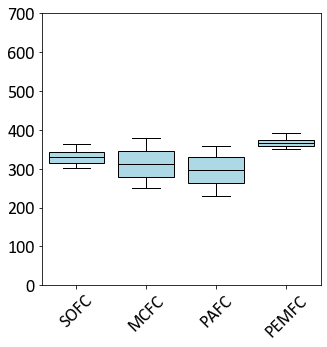

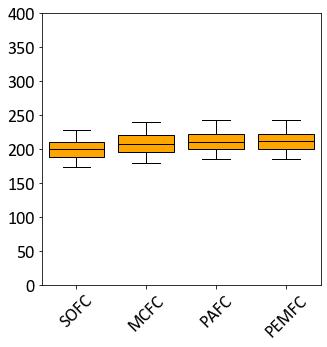

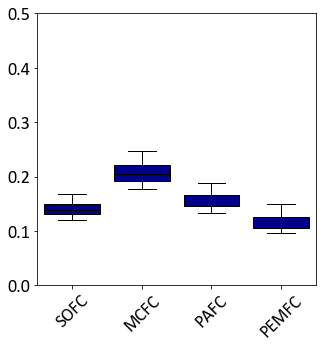

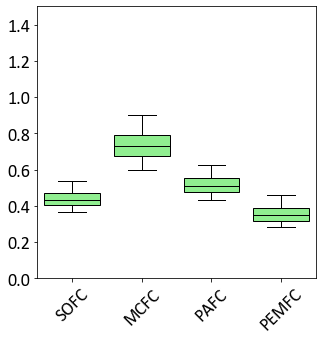

<IPython.core.display.Javascript object>

In [126]:
boxplot(gwp_pmc_lca, "lightblue", 0, 700)
plt.savefig(
    r"E:\tencent files\chrome Download\Research\LCA\LCA SOFC\Figures\mc_gwp_lca.png",
    transparent=True,
    dpi=600,
    bbox_inches="tight",
)
boxplot(fdp_pmc_lca, "orange", 0, 400)
plt.savefig(
    r"E:\tencent files\chrome Download\Research\LCA\LCA SOFC\Figures\mc_fdp_lca.png",
    transparent=True,
    dpi=600,
    bbox_inches="tight",
)
boxplot(pmfp_pmc_lca, "darkblue", 0, 0.5)
plt.savefig(
    r"E:\tencent files\chrome Download\Research\LCA\LCA SOFC\Figures\mc_pmfp_lca.png",
    transparent=True,
    dpi=600,
    bbox_inches="tight",
)
boxplot(ap_pmc_lca, "lightgreen", 0, 1.5)
plt.savefig(
    r"E:\tencent files\chrome Download\Research\LCA\LCA SOFC\Figures\mc_ap_lca.png",
    transparent=True,
    dpi=600,
    bbox_inches="tight",
)

In [ ]:
boxplot(manu_gwp_pmc, "lightblue", 0, 2000)
plt.savefig(
    r"E:\tencent files\chrome Download\Research\LCA\LCA SOFC\Figures\mc_gwp_manu.png",
    transparent=True,
    dpi=600,
    bbox_inches="tight",
)
bp_fdp = boxplot(manu_fdp_pmc, "orange", 0, 750)
plt.savefig(
    r"E:\tencent files\chrome Download\Research\LCA\LCA SOFC\Figures\mc_fdp_manu.png",
    transparent=True,
    dpi=600,
    bbox_inches="tight",
)
boxplot(manu_pmfp_pmc, "darkblue", 0, 20)
plt.savefig(
    r"E:\tencent files\chrome Download\Research\LCA\LCA SOFC\Figures\mc_pmfp_manu.png",
    transparent=True,
    dpi=600,
    bbox_inches="tight",
)
boxplot(manu_ap_pmc, "lightgreen", 0, 60)
plt.savefig(
    r"E:\tencent files\chrome Download\Research\LCA\LCA SOFC\Figures\mc_ap_manu.png",
    transparent=True,
    dpi=600,
    bbox_inches="tight",
)

In [ ]:
boxplot(op_gwp_pmc + expan_gwp_pmc, "lightblue", 0, 7000)
plt.savefig(
    r"E:\tencent files\chrome Download\Research\LCA\LCA SOFC\Figures\mc_gwp_op.png",
    transparent=True,
    dpi=600,
    bbox_inches="tight",
)
bp_fdp = boxplot(op_fdp_pmc + expan_fdp_pmc, "orange", 0, 3500)
plt.savefig(
    r"E:\tencent files\chrome Download\Research\LCA\LCA SOFC\Figures\mc_fdp_op.png",
    transparent=True,
    dpi=600,
    bbox_inches="tight",
)
boxplot(op_pmfp_pmc + expan_pmfp_pmc, "darkblue", 0, 2.5)
plt.savefig(
    r"E:\tencent files\chrome Download\Research\LCA\LCA SOFC\Figures\mc_pmfp_op.png",
    transparent=True,
    dpi=600,
    bbox_inches="tight",
)
boxplot(op_ap_pmc + expan_ap_pmc, "lightgreen", 0, 8)
plt.savefig(
    r"E:\tencent files\chrome Download\Research\LCA\LCA SOFC\Figures\mc_ap_op.png",
    transparent=True,
    dpi=600,
    bbox_inches="tight",
)

#  Sensitivity Analysis

## Sensitivity to recycle rate

In [ ]:
def sce_calc(sce_name, database, LCIA_method):
    # setup scenario calculation for SOFC
    sce_act = [find_by_name(name, database) for name in sce_name]
    sce_fu = [{sce_act[i]: 1} for i in range(len(sce_act))]
    bw.calculation_setups["fc_sce"] = {"inv": sce_fu, "ia": LCIA_method}
    sce_results = bw.MultiLCA("fc_sce").results
    return sce_results


sce_name = ["Disposal_scen1", "Disposal_scen2", "Disposal_scen3", "Disposal_scen4"]
indicators

In [ ]:
sofc_sce = sce_calc(sce_name, SOFC_import, indicators)
mcfc_sce = sce_calc(sce_name, MCFC_import, indicators)
pafc_sce = sce_calc(sce_name, PAFC_import, indicators)
pemfc_sce = sce_calc(sce_name, PEMFC_import, indicators)

In [ ]:
allocation_factor = 0.700897254

In [ ]:
sce_df = pd.concat(
    [
        pd.DataFrame(sofc_sce),
        pd.DataFrame(mcfc_sce),
        pd.DataFrame(pafc_sce),
        pd.DataFrame(pemfc_sce),
    ],
    axis=1,
)*allocation_factor
sce_df.to_excel(r"D:\desktop\recycling rate scenario1.xlsx")

In [ ]:
temp = sce_df.transpose()
ls = np.reshape(np.arange(16), (4, 4))
temp0 = []
for i in range(4):
    temp0.append(temp.iloc[ls[:, i]])

temp0
sce_df1 = pd.concat([df for df in temp0], axis=0,)
sce_df1.to_excel(r"D:\desktop\recycling rate scenario.xlsx")

##  Sensitivity to sys expansion activity

In [ ]:
ls = [22244.4, 18559.5, 8659.5, 0, 18408.3, -2512.95]
sys_exp_sce1 = [
    act
    for act in eidb
    if "heat production, air-water heat pump 10kW" in act["name"]
    and "RoW" in act["location"]
][0]
sys_exp_sce2 = [
    act
    for act in eidb
    if "heat production, biogas, at diffusion absorption heat pump 4kW, future"
    in act["name"]
][0]
baseCase_fu = []
sys_sce1_fu = []
sys_sce2_fu = []
for num in range(len(ls)):
    sys_sce1_fu.append({sys_exp_sce1: ls[num]})
    sys_sce2_fu.append({sys_exp_sce2: ls[num]})
    baseCase_fu.append({sysExp[0]: ls[num]})
sys_sce1_fu, sys_sce2_fu, baseCase_fu

In [ ]:
bw.calculation_setups["baseCase"] = {"inv": baseCase_fu, "ia": indicators}
baseCase_results = bw.MultiLCA("baseCase").results
baseCase_results

In [ ]:
bw.calculation_setups["sys_sce1"] = {"inv": sys_sce1_fu, "ia": indicators}
sys_sce1_results = bw.MultiLCA("sys_sce1").results
sys_sce1_results

In [ ]:
bw.calculation_setups["sys_sce2"] = {"inv": sys_sce2_fu, "ia": indicators}
sys_sce2_results = bw.MultiLCA("sys_sce2").results
sys_sce2_results

In [ ]:
indexes = ["SOFC", "MCFC", "PAFC", "PEMFC", "NGCC", "micro GT"]
columns = ["GHG emission", "fossil depletion", "paticle formation", "acidification"]
df_baseCase = pd.DataFrame(baseCase_results, index=indexes, columns=columns)
df_sys_sce1 = pd.DataFrame(sys_sce1_results, index=indexes, columns=columns)
df_sys_sce2 = pd.DataFrame(sys_sce2_results, index=indexes, columns=columns)
sys_sce_results = pd.concat([df_baseCase, df_sys_sce1, df_sys_sce2], axis=1)
sys_sce_results.to_excel(r"D:\desktop\sys_ex scenario.xlsx")

In [ ]:
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, fraction=0.03, pad=0.05, ax=ax)
    # fraction 设置colorbar相对于图的大小，pad设置colorbar到图的距离
    cbar.ax.set_ylabel(
        cbarlabel, rotation=-90, va="bottom", fontsize=16, fontname="Calibri"
    )

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-90)
    plt.xticks(fontname="Calibri", fontsize=18)
    plt.yticks(fontname="Calibri", fontsize=18)
    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1] + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0] + 1) - 0.5, minor=True)
    ax.grid(which="minor", color="w", linestyle="-", linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

In [ ]:
index = list
tes = pd.read_excel(r"D:\desktop\test.xlsx", index_col=0)
tes

In [ ]:
fig, ax = plt.subplots()
im, cbar = heatmap(
    tes,
    ["Base case", "Scenario 1", "Scenario 2"],
    indexes,
    cmap="YlGn",
    cbarlabel="GHG emission (kg CO2 eq.)",
)
plt.savefig(
    r"E:\tencent files\chrome Download\Research\LCA\LCA SOFC\Figures\gwp_sysexp.png",
    dpi=600,
    bbox_inches="tight",
)

## Sensitivity to technical performance 

In [ ]:
ng_input_act = [
    act
    for act in eidb
    if "market for natural gas, low pressure" in act["name"]
    and "RoW" in act["location"]
    and "cubic meter" in act["unit"]
][0]
ng_input_act

In [ ]:
ng_input_amout = [1498.1, 1689.3, 1890.5, 2145.9]

In [ ]:
# 找到需要改进的技术参数及其现在的值,并计算LCA
def get_tech_imp_LCA(act, imp_rate, ng_input_amount):
    ng_input_exc = [exc for exc in act.technosphere()][0]  # obtain
    act.technosphere().delete()  # delete previouse exchange
    ng_input_scenario = ng_input_amount * (1 + imp_rate)
    ng_input_sce = act.new_exchange(
        input=ng_input_act, amount=ng_input_scenario, type="technosphere"
    )
    ng_input_sce.save()

    act_FU = [{act: 1}]
    name = [act.as_dict()["name"]]
    bw.calculation_setups["tech_imp_LCA"] = {"inv": act_FU, "ia": indicators}
    tech_imp_LCA = bw.MultiLCA("tech_imp_LCA").results
    df_tech_imp = pd.DataFrame(tech_imp_LCA, index=name, columns=ia_cat1)
    return df_tech_imp

In [ ]:
sofc_tech_imp1 = get_tech_imp_LCA(operation[0], 0.05, ng_input_amout[0])
mcfc_tech_imp1 = get_tech_imp_LCA(operation[1], 0.05, ng_input_amout[1])
pafc_tech_imp1 = get_tech_imp_LCA(operation[2], 0.05, ng_input_amout[2])
pemfc_tech_imp1 = get_tech_imp_LCA(operation[3], 0.05, ng_input_amout[3])
sofc_tech_imp2 = get_tech_imp_LCA(operation[0], 0.15, ng_input_amout[0])
mcfc_tech_imp2 = get_tech_imp_LCA(operation[1], 0.15, ng_input_amout[1])
pafc_tech_imp2 = get_tech_imp_LCA(operation[2], 0.15, ng_input_amout[2])
pemfc_tech_imp2 = get_tech_imp_LCA(operation[3], 0.15, ng_input_amout[3])

In [ ]:
df_tech_imp = pd.concat(
    [
        sofc_tech_imp1,
        mcfc_tech_imp1,
        pafc_tech_imp1,
        pemfc_tech_imp1,
        sofc_tech_imp2,
        mcfc_tech_imp2,
        pafc_tech_imp2,
        pemfc_tech_imp2,
    ],
    axis=0,
)
df_tech_imp

In [ ]:
df_tech_imp.to_excel(r"D:\desktop\Efficiency_loss_scenarios.xlsx")

In [ ]:
biogas_input = [
    act
    for act in eidb
    if "methane, 96% by volume, from biogas, low pressure, at user" in act["name"]
    and "RoW" in act["location"]
][0]

In [ ]:
biogas_input

In [ ]:
def Scenario_LCA(activity, new_exchange, imp_rate, ng_input_amount):
    ng_input_exc = [exc for exc in activity.technosphere()][0]  # obtain
    activity.technosphere().delete()  # delete previouse exchange
    ng_input_scenario = ng_input_amount * (1 + imp_rate)
    ng_input_sce = activity.new_exchange(
        input=new_exchange, amount=ng_input_scenario, type="technosphere"
    )
    ng_input_sce.save()

    act_FU = [{activity: 1}]
    name = [activity.as_dict()["name"]]
    bw.calculation_setups["tech_imp_LCA"] = {"inv": act_FU, "ia": indicators}
    tech_imp_LCA = bw.MultiLCA("tech_imp_LCA").results
    df_tech_imp = pd.DataFrame(tech_imp_LCA, index=name, columns=ia_cat1)
    return df_tech_imp

In [ ]:
sofc_biogas_0 = Scenario_LCA(operation[0], biogas_input, 0, 47552.4)

In [ ]:
pd.DataFrame(sofc_biogas_0)

In [ ]:
list(operation[0].exchanges())

##  Calc Pearson's coeff of LCIA

In [ ]:
def pearson_corr(df_pmc_results):  # calc pearson's coefficients of LCIA results
    df_trans = df_pmc_results.transpose()
    df_trans_midpoint = df_trans
    results = df_trans_midpoint.corr(method="pearson")
    # 矩阵运算
    pear_diag = pd.DataFrame(np.diag(np.diag(results)))
    pear_tril = pd.DataFrame(np.tril(results, -1))
    pear_final = pear_tril + pear_diag
    masked_correlation = np.ma.array(pear_final, mask=pear_final == 0)
    pear_mid_final = pd.DataFrame(masked_correlation, index=columns, columns=columns)
    return pear_mid_final

In [ ]:
pearson_corr(.iloc[:4])

In [ ]:
pear_sofc = pearson_corr(manu_pmc.iloc[:4])
fig, ax = plt.subplots()
im, cbar = heatmap(pear_sofc, columns, columns, ax=ax, cmap="YlGn", cbarlabel="r-value")
plt.savefig(
    r"E:\tencent files\chrome Download\Research\LCA\LCA SOFC\Figures\pear_sofc.png",
    dpi=600,
    bbox_inches="tight",
)